## TTNet-Tensorflow

### Imports

In [28]:
import os
import json
import shutil
import random

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Visualize the dataset: [OpenTTGames](https://lab.osai.ai/)

The dataset contains videos of table tennis games at 120 fps. There are annotations for **events** (ball bounces, net hits, empty), ball **positions** (x, y), and **segmentation masks**. Thus, the only usable data are the images that have all of the annotations.

There are 5 videos for training and 7 videos for testing.

In [25]:
# The directories
training_data_dir = "dataset/training"
testing_data_dir = "dataset/testing"

annotations = "annotations"
segmentation_masks = "segmentation_masks"
images = "images"
videos = "videos"

games = os.listdir(os.path.join(training_data_dir, images))

In [22]:
def display_images(game_dir: str, game_files: str, num_frames:int = 7):
    rows, cols = 1, num_frames
    game_fig = plt.figure(figsize=(20, 10))

    for frame in range(num_frames):
        image_fp = os.path.join(game_dir, game_files[frame])
        game_1_ax = game_fig.add_subplot(rows, cols, frame+1)
        plt.imshow(plt.imread(image_fp))
        game_1_ax.set_title(f"Frame {frame+1}")
    plt.show()

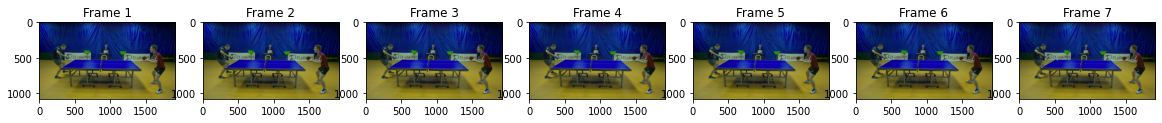

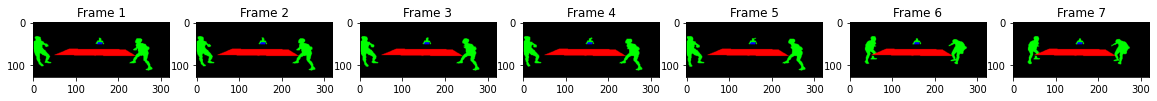

In [27]:
# Display Game 1 Data
display_images(
    game_dir=os.path.join(training_data_dir, images, games[0]),
    game_files=os.listdir(os.path.join(training_data_dir, images, games[0])))
display_images(
    game_dir=os.path.join(training_data_dir, annotations, games[0], segmentation_masks),
    game_files=os.listdir(os.path.join(training_data_dir, annotations, games[0], segmentation_masks)))

In [31]:
def frame_number(file_name: str):
    """Gets the frame number from file name."""
    return int(file_name.split(".")[0][len("img_"):])

In [39]:
# Read the .JSON annotations
game_1_bm = json.load(open(os.path.join(training_data_dir, annotations, games[0], "ball_markup.json")))
frames = [frame_num for frame_num in game_1_bm]